In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [3]:
ICIR = pd.read_csv('C:\\Users\\zijun\\OneDrive\\Desktop\\刘子隽_项目数据.csv', index_col = [0])

ICIR.rename(index = str, columns = {"代码":"Code", "日期":"Date", "未来涨幅":"FutureReturn",
                                    "总市值":"Size", "最近1个月涨幅":"Momentum"}, inplace = True)
ICIR.set_index(['Date', 'Code'], inplace = True)
ICIR.sort_index(inplace = True)


In [7]:
ICIR.index.levels[0]

Index(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29', '2016-05-31',
       '2016-06-30', '2016-07-29', '2016-08-31', '2016-09-30', '2016-10-31',
       '2016-11-30', '2016-12-30', '2017-01-26', '2017-02-28', '2017-03-31',
       '2017-04-28', '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
       '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-29'],
      dtype='object', name='Date')

Cap = Size factor

LastReturn = Momentum factor

IC of factors

In [4]:
results = pd.DataFrame(index = ICIR.index.levels[0], columns = ICIR.columns[1:])
for i in range(len(ICIR.columns) - 1):
    results.iloc[:,i] = ICIR.groupby(['Date']).apply(lambda df: df.iloc[:, i+1].corr(df['FutureReturn']))
results

,Size,Momentum
Date,,
2016-01-29,-0.006579,-0.027742
2016-02-29,-0.118308,-0.321215
2016-03-31,-0.041227,-0.053514
2016-04-29,0.036049,-0.070636
2016-05-31,-0.089295,0.004401
2016-06-30,0.059202,-0.290722
2016-07-29,-0.033011,-0.079309
2016-08-31,-0.048300,0.080441
2016-09-30,-0.034486,-0.069705


Rank IC of factors

In [63]:
RankICresults = pd.DataFrame(ICIR.groupby(['Date']).apply(lambda df: df['Cap'].corr(df['FutureReturn'],
                                                                                    method = 'spearman')))
RankICresults.rename(index = str, columns = {RankICresults.columns[0]:"Size"}, inplace = True)
RankICresults['Momentum'] = ICIR.groupby(['Date']).apply(lambda df: df['LastReturn'].corr(df['FutureReturn'],
                                                                                          method = 'spearman'))
RankICresults

,Size,Momentum
Date,,
2016-01-29,-0.038217,-0.025758
2016-02-29,-0.298454,-0.378787
2016-03-31,-0.309608,-0.054529
2016-04-29,0.166510,-0.127758
2016-05-31,-0.227522,-0.017420
2016-06-30,0.093345,-0.323385
2016-07-29,-0.232409,-0.088182
2016-08-31,-0.270948,0.095210
2016-09-30,-0.149490,-0.140334


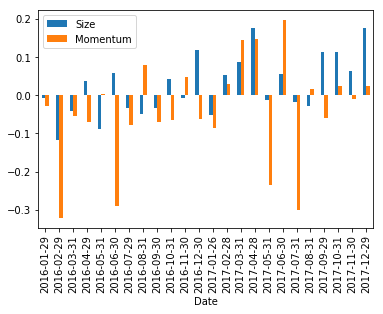

In [68]:
results.plot(kind = 'bar')
plt.show()

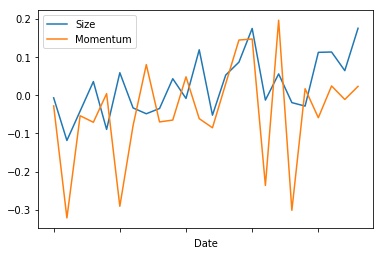

In [70]:
results.plot()
plt.show()

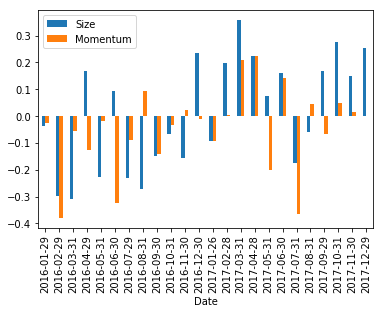

In [69]:
RankICresults.plot(kind = 'bar')
plt.show()

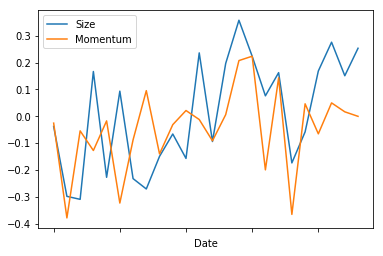

In [71]:
RankICresults.plot()
plt.show()

IR of factors

In [73]:
N = 12
resultsIR = pd.DataFrame(index = results.index, columns = results.columns)
for i in range(len(results.columns)):
    resultsIR[i] = results.iloc[:,i].rolling(N).mean() / results.iloc[:,i].rolling(N).std() * np.sqrt(12)
resultsIR

,Size,Momentum
Date,,
2016-01-29,NaN,NaN
2016-02-29,NaN,NaN
2016-03-31,NaN,NaN
2016-04-29,NaN,NaN
2016-05-31,NaN,NaN
2016-06-30,NaN,NaN
2016-07-29,NaN,NaN
2016-08-31,NaN,NaN
2016-09-30,NaN,NaN


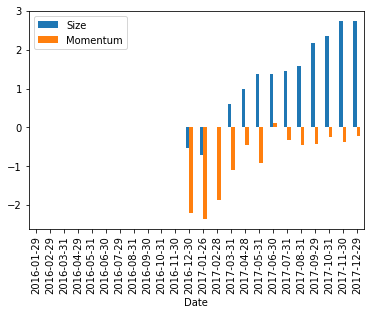

In [74]:
resultsIR.plot(kind = 'bar')
plt.show()

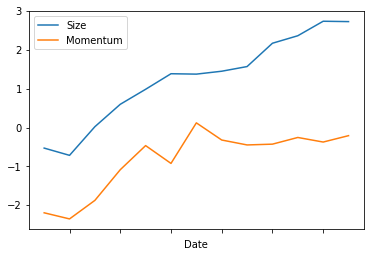

In [75]:
resultsIR.plot()
plt.show()

等权加权

In [59]:
w = np.repeat(1/len(results.columns), len(results.columns))
w

array([0.5, 0.5])

In [225]:
equalweights = pd.DataFrame(index = ICIR.index, columns = results.columns)
for i in range(len(results.columns)):
    equalweights[i] = w[i]
equalweights.head(20)

Size  Momentum
Date       Code                    
2016-01-29 SH600000   0.5       0.5
           SH600004   0.5       0.5
           SH600005   0.5       0.5
           SH600006   0.5       0.5
           SH600007   0.5       0.5
           SH600008   0.5       0.5
           SH600009   0.5       0.5
           SH600011   0.5       0.5
           SH600012   0.5       0.5
           SH600015   0.5       0.5
           SH600016   0.5       0.5
           SH600017   0.5       0.5
           SH600018   0.5       0.5
           SH600019   0.5       0.5
           SH600020   0.5       0.5
           SH600021   0.5       0.5
           SH600022   0.5       0.5
           SH600023   0.5       0.5
           SH600026   0.5       0.5
           SH600027   0.5       0.5

In [226]:
equalweights.tail(20)

Size  Momentum
Date       Code                    
2017-12-29 SZ300559   0.5       0.5
           SZ300560   0.5       0.5
           SZ300561   0.5       0.5
           SZ300563   0.5       0.5
           SZ300565   0.5       0.5
           SZ300566   0.5       0.5
           SZ300567   0.5       0.5
           SZ300568   0.5       0.5
           SZ300569   0.5       0.5
           SZ300570   0.5       0.5
           SZ300571   0.5       0.5
           SZ300572   0.5       0.5
           SZ300573   0.5       0.5
           SZ300575   0.5       0.5
           SZ300576   0.5       0.5
           SZ300577   0.5       0.5
           SZ300579   0.5       0.5
           SZ300581   0.5       0.5
           SZ300582   0.5       0.5
           SZ300585   0.5       0.5

In [98]:
ICIR['compositeF'] = ICIR.drop(['FutureReturn'], axis = 1).mul(equalweights).sum(axis = 1, skipna = False)

In [99]:
ICIR.head(10)

FutureReturn          Size   Momentum    compositeF
Date       Code                                                         
2016-01-29 SH600000      9.171598  3.152437e+07  -7.498632  1.576218e+07
           SH600004     -7.616708  1.404150e+06 -14.195362  7.020679e+05
           SH600005     -0.709220  2.846446e+06 -18.731988  1.423214e+06
           SH600006      5.972696  1.172000e+06 -33.860045  5.859831e+05
           SH600007     -8.002690  1.497829e+06 -20.820021  7.489042e+05
           SH600008      5.539359  1.653471e+06 -32.679097  8.267190e+05
           SH600009      5.181748  4.983115e+06 -12.398374  2.491551e+06
           SH600011      0.437318  1.042746e+07 -21.420389  5.213721e+06
           SH600012      5.671902  1.900767e+06 -14.285714  9.503764e+05
           SH600015     -2.308499  1.018335e+07 -21.499176  5.091664e+06

In [100]:
ICIR.tail(10)

FutureReturn          Size   Momentum     compositeF
Date       Code                                                          
2017-12-29 SZ300571     21.047009  374400.00000   1.298701  187200.649351
           SZ300572      9.777638  426457.61400  14.831583  213236.222791
           SZ300573     -5.524194  198400.00000 -14.805909   99192.597046
           SZ300575      3.658844  290686.05000 -19.039837  145333.505082
           SZ300576     -7.301402  205440.00000  -8.449198  102715.775401
           SZ300577      2.972227  743536.06704   5.790378  371770.928709
           SZ300579     -4.911111  360000.00000  -5.897114  179997.051443
           SZ300581     -3.691604  276714.40000  -8.544966  138352.927517
           SZ300582    -22.329545  356579.71008  -5.223479  178287.243301
           SZ300585    -11.836518  301440.00000  -9.379509  150715.310245

IC均值加权

In [163]:
N = 12
ICmeanweights = pd.DataFrame(index = results.index, columns = results.columns)
for i in range(len(results.columns)):
    ICmeanweights[i] = results.iloc[:,i].rolling(N).mean()
ICmeanweights

,Size,Momentum
Date,,
2016-01-29,NaN,NaN
2016-02-29,NaN,NaN
2016-03-31,NaN,NaN
2016-04-29,NaN,NaN
2016-05-31,NaN,NaN
2016-06-30,NaN,NaN
2016-07-29,NaN,NaN
2016-08-31,NaN,NaN
2016-09-30,NaN,NaN


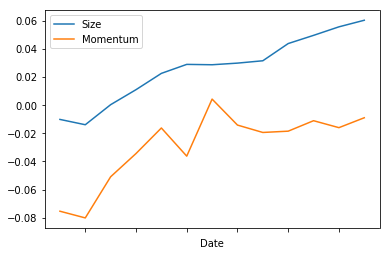

In [54]:
ICmeanweights.plot()
plt.show()

In [169]:
ICIR['compositeF'] = np.nan
for i in range(len(ICIR)):
    dateindex = ICIR.index[i][0]
    ICIR['compositeF'].iloc[i] = ICIR.drop(['FutureReturn', 'compositeF'], axis = 1).iloc[i].mul(ICmeanweights.loc[dateindex]).sum(skipna = False)

In [171]:
ICIR.head(20)

FutureReturn          Size   Momentum  compositeF
Date       Code                                                       
2016-01-29 SH600000      9.171598  3.152437e+07  -7.498632         NaN
           SH600004     -7.616708  1.404150e+06 -14.195362         NaN
           SH600005     -0.709220  2.846446e+06 -18.731988         NaN
           SH600006      5.972696  1.172000e+06 -33.860045         NaN
           SH600007     -8.002690  1.497829e+06 -20.820021         NaN
           SH600008      5.539359  1.653471e+06 -32.679097         NaN
           SH600009      5.181748  4.983115e+06 -12.398374         NaN
           SH600011      0.437318  1.042746e+07 -21.420389         NaN
           SH600012      5.671902  1.900767e+06 -14.285714         NaN
           SH600015     -2.308499  1.018335e+07 -21.499176         NaN
           SH600016     -0.783867  3.134091e+07 -10.892116         NaN
           SH600017     -3.317536  1.297926e+06 -35.474006         NaN
           SH600018     -0.642398  1.082211e+07 -27.932099         NaN
           SH600019     -2.687140  8.579577e+06  -6.630824         NaN
           SH600020     -1.609658  1.116944e+06 -27.339181         NaN
           SH600021     11.608961  2.101224e+06 -33.288043         NaN
           SH600022      0.819672  2.054583e+06 -21.543408         NaN
           SH600023     -1.343570  7.085959e+06 -30.440587         NaN
           SH600026     -1.803279  2.459540e+06 -33.982684         NaN
           SH600027      4.183267  4.951214e+06 -26.176471         NaN

In [172]:
ICIR.tail(20)

FutureReturn          Size   Momentum    compositeF
Date       Code                                                         
2017-12-29 SZ300559      0.750000  2.872000e+05   4.904275  17375.320999
           SZ300560    -16.763173  3.632917e+05 -14.314066  21978.979112
           SZ300561     18.469016  2.803467e+05  -3.147985  16960.774981
           SZ300563    -12.325286  2.518400e+05  -3.168256  15236.141954
           SZ300565    -15.335753  3.526400e+05   4.356061  21334.392281
           SZ300566      6.997319  4.639486e+05  -1.971091  28068.527220
           SZ300567    -13.866807  1.092148e+06   2.838192  66074.030283
           SZ300568     -1.724138  5.122560e+05  -4.132231  30991.105225
           SZ300569      8.120035  3.399272e+05  -2.871839  20565.342268
           SZ300570    -16.026553  4.850633e+05   2.677702  29345.905469
           SZ300571     21.047009  3.744000e+05   1.298701  22650.881721
           SZ300572      9.777638  4.264576e+05  14.831583  25800.204041
           SZ300573     -5.524194  1.984000e+05 -14.805909  12003.169512
           SZ300575      3.658844  2.906860e+05 -19.039837  17586.437697
           SZ300576     -7.301402  2.054400e+05  -8.449198  12429.027058
           SZ300577      2.972227  7.435361e+05   5.790378  44983.271336
           SZ300579     -4.911111  3.600000e+05  -5.897114  21779.757688
           SZ300581     -3.691604  2.767144e+05  -8.544966  16741.070726
           SZ300582    -22.329545  3.565797e+05  -5.223479  21572.826942
           SZ300585    -11.836518  3.014400e+05  -9.379509  18236.956714

IC_IR加权

In [175]:
N = 12
IRweights = pd.DataFrame(index = results.index, columns = results.columns)
for i in range(len(results.columns)):
    IRweights[i] = results.iloc[:,i].rolling(N).mean() / results.iloc[:,i].rolling(N).std()
IRweights

,Size,Momentum
Date,,
2016-01-29,NaN,NaN
2016-02-29,NaN,NaN
2016-03-31,NaN,NaN
2016-04-29,NaN,NaN
2016-05-31,NaN,NaN
2016-06-30,NaN,NaN
2016-07-29,NaN,NaN
2016-08-31,NaN,NaN
2016-09-30,NaN,NaN


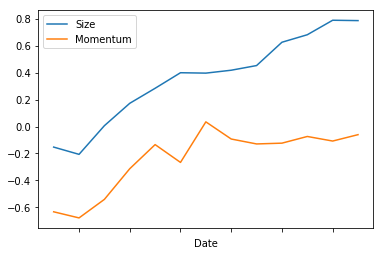

In [176]:
IRweights.plot()
plt.show()

In [177]:
ICIR['compositeF'] = np.nan
for i in range(len(ICIR)):
    dateindex = ICIR.index[i][0]
    ICIR['compositeF'].iloc[i] = ICIR.drop(['FutureReturn', 'compositeF'], axis = 1).iloc[i].mul(IRweights.loc[dateindex]).sum(skipna = False) 

In [178]:
ICIR.head(20)

FutureReturn          Size   Momentum  compositeF
Date       Code                                                       
2016-01-29 SH600000      9.171598  3.152437e+07  -7.498632         NaN
           SH600004     -7.616708  1.404150e+06 -14.195362         NaN
           SH600005     -0.709220  2.846446e+06 -18.731988         NaN
           SH600006      5.972696  1.172000e+06 -33.860045         NaN
           SH600007     -8.002690  1.497829e+06 -20.820021         NaN
           SH600008      5.539359  1.653471e+06 -32.679097         NaN
           SH600009      5.181748  4.983115e+06 -12.398374         NaN
           SH600011      0.437318  1.042746e+07 -21.420389         NaN
           SH600012      5.671902  1.900767e+06 -14.285714         NaN
           SH600015     -2.308499  1.018335e+07 -21.499176         NaN
           SH600016     -0.783867  3.134091e+07 -10.892116         NaN
           SH600017     -3.317536  1.297926e+06 -35.474006         NaN
           SH600018     -0.642398  1.082211e+07 -27.932099         NaN
           SH600019     -2.687140  8.579577e+06  -6.630824         NaN
           SH600020     -1.609658  1.116944e+06 -27.339181         NaN
           SH600021     11.608961  2.101224e+06 -33.288043         NaN
           SH600022      0.819672  2.054583e+06 -21.543408         NaN
           SH600023     -1.343570  7.085959e+06 -30.440587         NaN
           SH600026     -1.803279  2.459540e+06 -33.982684         NaN
           SH600027      4.183267  4.951214e+06 -26.176471         NaN

In [179]:
ICIR.tail(20)

FutureReturn          Size   Momentum     compositeF
Date       Code                                                          
2017-12-29 SZ300559      0.750000  2.872000e+05   4.904275  226147.307081
           SZ300560    -16.763173  3.632917e+05 -14.314066  286064.762303
           SZ300561     18.469016  2.803467e+05  -3.147985  220751.369409
           SZ300563    -12.325286  2.518400e+05  -3.168256  198304.551698
           SZ300565    -15.335753  3.526400e+05   4.356061  277676.236892
           SZ300566      6.997319  4.639486e+05  -1.971091  365323.453020
           SZ300567    -13.866807  1.092148e+06   2.838192  859981.159908
           SZ300568     -1.724138  5.122560e+05  -4.132231  403361.901598
           SZ300569      8.120035  3.399272e+05  -2.871839  267666.328125
           SZ300570    -16.026553  4.850633e+05   2.677702  381949.321598
           SZ300571     21.047009  3.744000e+05   1.298701  294810.724445
           SZ300572      9.777638  4.264576e+05  14.831583  335801.219224
           SZ300573     -5.524194  1.984000e+05 -14.805909  156225.421389
           SZ300575      3.658844  2.906860e+05 -19.039837  228893.744413
           SZ300576     -7.301402  2.054400e+05  -8.449198  161768.488811
           SZ300577      2.972227  7.435361e+05   5.790378  585476.319519
           SZ300579     -4.911111  3.600000e+05  -5.897114  283472.281617
           SZ300581     -3.691604  2.767144e+05  -8.544966  217891.526331
           SZ300582    -22.329545  3.565797e+05  -5.223479  280779.029385
           SZ300585    -11.836518  3.014400e+05  -9.379509  237361.058488

最优化复合IR加权

In [221]:
N = 12
meanICvector = pd.DataFrame(index = results.index, columns = results.columns)
for i in range(len(results.columns)):
    meanICvector[i] = results.iloc[:,i].rolling(N).mean()
meanICvector

,Size,Momentum
Date,,
2016-01-29,NaN,NaN
2016-02-29,NaN,NaN
2016-03-31,NaN,NaN
2016-04-29,NaN,NaN
2016-05-31,NaN,NaN
2016-06-30,NaN,NaN
2016-07-29,NaN,NaN
2016-08-31,NaN,NaN
2016-09-30,NaN,NaN


In [222]:
ICIR['compositeF'] = np.nan
for i in range(len(ICIR)):
    dateindex = ICIR.index[i][0]
    meanICvector_t = meanICvector.loc[dateindex]
    covmatrix_t = results.rolling(N).cov().loc[dateindex]
    temp = np.matmul(inv(covmatrix_t), meanICvector_t)
    s = 1 / sum(temp)
    weightvector_t = np.dot(temp, s)
    ICIR['compositeF'].iloc[i] = ICIR.drop(['FutureReturn', 'compositeF'], axis = 1).iloc[i].mul(weightvector_t).sum(skipna = False) 

In [223]:
ICIR.head(20)

FutureReturn          Size   Momentum  compositeF
Date       Code                                                       
2016-01-29 SH600000      9.171598  3.152437e+07  -7.498632         NaN
           SH600004     -7.616708  1.404150e+06 -14.195362         NaN
           SH600005     -0.709220  2.846446e+06 -18.731988         NaN
           SH600006      5.972696  1.172000e+06 -33.860045         NaN
           SH600007     -8.002690  1.497829e+06 -20.820021         NaN
           SH600008      5.539359  1.653471e+06 -32.679097         NaN
           SH600009      5.181748  4.983115e+06 -12.398374         NaN
           SH600011      0.437318  1.042746e+07 -21.420389         NaN
           SH600012      5.671902  1.900767e+06 -14.285714         NaN
           SH600015     -2.308499  1.018335e+07 -21.499176         NaN
           SH600016     -0.783867  3.134091e+07 -10.892116         NaN
           SH600017     -3.317536  1.297926e+06 -35.474006         NaN
           SH600018     -0.642398  1.082211e+07 -27.932099         NaN
           SH600019     -2.687140  8.579577e+06  -6.630824         NaN
           SH600020     -1.609658  1.116944e+06 -27.339181         NaN
           SH600021     11.608961  2.101224e+06 -33.288043         NaN
           SH600022      0.819672  2.054583e+06 -21.543408         NaN
           SH600023     -1.343570  7.085959e+06 -30.440587         NaN
           SH600026     -1.803279  2.459540e+06 -33.982684         NaN
           SH600027      4.183267  4.951214e+06 -26.176471         NaN

In [224]:
ICIR.tail(20)

FutureReturn          Size   Momentum    compositeF
Date       Code                                                         
2017-12-29 SZ300559      0.750000  2.872000e+05   4.904275  4.204539e+05
           SZ300560    -16.763173  3.632917e+05 -14.314066  5.318599e+05
           SZ300561     18.469016  2.803467e+05  -3.147985  4.104246e+05
           SZ300563    -12.325286  2.518400e+05  -3.168256  3.686912e+05
           SZ300565    -15.335753  3.526400e+05   4.356061  5.162573e+05
           SZ300566      6.997319  4.639486e+05  -1.971091  6.792142e+05
           SZ300567    -13.866807  1.092148e+06   2.838192  1.598886e+06
           SZ300568     -1.724138  5.122560e+05  -4.132231  7.499365e+05
           SZ300569      8.120035  3.399272e+05  -2.871839  4.976493e+05
           SZ300570    -16.026553  4.850633e+05   2.677702  7.101236e+05
           SZ300571     21.047009  3.744000e+05   1.298701  5.481150e+05
           SZ300572      9.777638  4.264576e+05  14.831583  6.243202e+05
           SZ300573     -5.524194  1.984000e+05 -14.805909  2.904613e+05
           SZ300575      3.658844  2.906860e+05 -19.039837  4.255686e+05
           SZ300576     -7.301402  2.054400e+05  -8.449198  3.007648e+05
           SZ300577      2.972227  7.435361e+05   5.790378  1.088522e+06
           SZ300579     -4.911111  3.600000e+05  -5.897114  5.270370e+05
           SZ300581     -3.691604  2.767144e+05  -8.544966  4.051094e+05
           SZ300582    -22.329545  3.565797e+05  -5.223479  5.220294e+05
           SZ300585    -11.836518  3.014400e+05  -9.379509  4.413077e+05

半衰IC加权

In [234]:
H = 2
N = 12
cumsum = 0
for t in range(1, N+1):
    cumsum = cumsum + np.power(2, -t/H)
w = np.zeros(N)
for i in range(1, N+1):
    w[i-1] = np.power(2, (i-N-1)/H) / cumsum
w

array([0.00657482, 0.0092982 , 0.01314964, 0.01859639, 0.02629927,
       0.03719279, 0.05259855, 0.07438558, 0.1051971 , 0.14877116,
       0.21039419, 0.29754232])

In [230]:
w.sum()

1.0

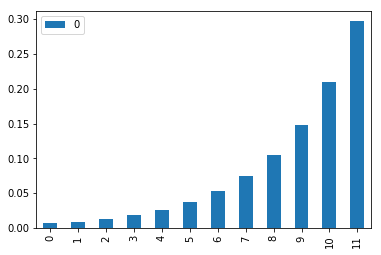

In [235]:
pd.DataFrame(w).plot(kind = 'bar')
plt.show()

In [239]:
HalfDecayweights = pd.DataFrame(index = results.index, columns = results.columns)
for i in range(len(results.columns)):
    HalfDecayweights[i] = results.iloc[:,i].rolling(N).agg(lambda x: x.mul(w).sum(skipna = False))
HalfDecayweights

,Size,Momentum
Date,,
2016-01-29,NaN,NaN
2016-02-29,NaN,NaN
2016-03-31,NaN,NaN
2016-04-29,NaN,NaN
2016-05-31,NaN,NaN
2016-06-30,NaN,NaN
2016-07-29,NaN,NaN
2016-08-31,NaN,NaN
2016-09-30,NaN,NaN


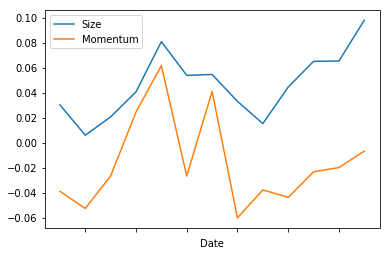

In [240]:
HalfDecayweights.plot()
plt.show()

In [241]:
ICIR['compositeF'] = np.nan
for i in range(len(ICIR)):
    dateindex = ICIR.index[i][0]
    ICIR['compositeF'].iloc[i] = ICIR.drop(['FutureReturn', 'compositeF'], axis = 1).iloc[i].mul(HalfDecayweights.loc[dateindex]).sum(skipna = False) 

In [242]:
ICIR.head(20)

FutureReturn          Size   Momentum  compositeF
Date       Code                                                       
2016-01-29 SH600000      9.171598  3.152437e+07  -7.498632         NaN
           SH600004     -7.616708  1.404150e+06 -14.195362         NaN
           SH600005     -0.709220  2.846446e+06 -18.731988         NaN
           SH600006      5.972696  1.172000e+06 -33.860045         NaN
           SH600007     -8.002690  1.497829e+06 -20.820021         NaN
           SH600008      5.539359  1.653471e+06 -32.679097         NaN
           SH600009      5.181748  4.983115e+06 -12.398374         NaN
           SH600011      0.437318  1.042746e+07 -21.420389         NaN
           SH600012      5.671902  1.900767e+06 -14.285714         NaN
           SH600015     -2.308499  1.018335e+07 -21.499176         NaN
           SH600016     -0.783867  3.134091e+07 -10.892116         NaN
           SH600017     -3.317536  1.297926e+06 -35.474006         NaN
           SH600018     -0.642398  1.082211e+07 -27.932099         NaN
           SH600019     -2.687140  8.579577e+06  -6.630824         NaN
           SH600020     -1.609658  1.116944e+06 -27.339181         NaN
           SH600021     11.608961  2.101224e+06 -33.288043         NaN
           SH600022      0.819672  2.054583e+06 -21.543408         NaN
           SH600023     -1.343570  7.085959e+06 -30.440587         NaN
           SH600026     -1.803279  2.459540e+06 -33.982684         NaN
           SH600027      4.183267  4.951214e+06 -26.176471         NaN

In [243]:
ICIR.tail(20)

FutureReturn          Size   Momentum     compositeF
Date       Code                                                          
2017-12-29 SZ300559      0.750000  2.872000e+05   4.904275   28091.825178
           SZ300560    -16.763173  3.632917e+05 -14.314066   35534.707858
           SZ300561     18.469016  2.803467e+05  -3.147985   27421.541621
           SZ300563    -12.325286  2.518400e+05  -3.168256   24633.217394
           SZ300565    -15.335753  3.526400e+05   4.356061   34492.703787
           SZ300566      6.997319  4.639486e+05  -1.971091   45380.161086
           SZ300567    -13.866807  1.092148e+06   2.838192  106826.115035
           SZ300568     -1.724138  5.122560e+05  -4.132231   50105.262850
           SZ300569      8.120035  3.399272e+05  -2.871839   33249.277242
           SZ300570    -16.026553  4.850633e+05   2.677702   47445.414859
           SZ300571     21.047009  3.744000e+05   1.298701   36621.133114
           SZ300572      9.777638  4.264576e+05  14.831583   41712.944973
           SZ300573     -5.524194  1.984000e+05 -14.805909   19406.177318
           SZ300575      3.658844  2.906860e+05 -19.039837   28432.970779
           SZ300576     -7.301402  2.054400e+05  -8.449198   20094.736181
           SZ300577      2.972227  7.435361e+05   5.790378   72727.363783
           SZ300579     -4.911111  3.600000e+05  -5.897114   35212.677240
           SZ300581     -3.691604  2.767144e+05  -8.544966   27066.291136
           SZ300582    -22.329545  3.565797e+05  -5.223479   34878.124192
           SZ300585    -11.836518  3.014400e+05  -9.379509   29484.779019

IC的时间衰减

In [246]:
# time-decayed IC of factors
N = 6
results = pd.DataFrame(index = ICIR.index)
results.reset_index(level = ['Code'], inplace = True)
results.drop(['Code'], axis = 1, inplace = True)
results.sort_index(inplace = True)
results = results[~results.index.duplicated(keep = 'first')]
for i in range(len(ICIR.columns) - 1):
    results[i] = ICIR.groupby(['Date']).apply(lambda df: df.iloc[:, i+1].corr(df.groupby(['Date'])['FutureReturn'].shift(N)))
results.columns = ICIR.columns[1:]
results

,Size,Momentum
Date,,
2016-01-29,0.040936,-0.002743
2016-02-29,-0.074311,-0.062904
2016-03-31,-0.019339,-0.032303
2016-04-29,-0.012009,-0.006560
2016-05-31,-0.052882,0.020545
2016-06-30,0.030305,-0.091656
2016-07-29,-0.011303,-0.011527
2016-08-31,-0.033095,0.039606
2016-09-30,0.004870,0.016162


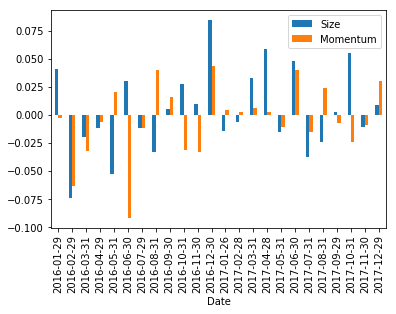

In [247]:
results.plot(kind = 'bar')
plt.show()

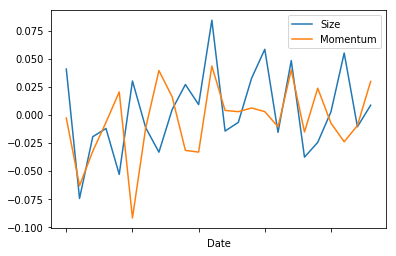

In [248]:
results.plot()
plt.show()